In [406]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [407]:
#cdc_df = pd.read_sas('LLCP2021.XPT')

In [408]:
cdc_df.shape

(438693, 303)



---



---



In [409]:
heart_df=cdc_df.copy()
print('Completed..')

Completed..


In [410]:
[x for x in heart_df.columns if 'MARIJAN1' in x]

['MARIJAN1']

In [411]:
columns_to_rename={ '_SEX':'SEX',
                         '_RFHLTH':'GENERAL_HEALTH', '_PHYS14D':'PHYSICAL_HEALTH',
                         '_MENT14D':'MENTAL_HEALTH_30','_HCVU652':'HEALTH_PLAN',
                         'CHECKUP1':'ROUTIN_CHECKUP',
                          '_TOTINDA':'EXERCISE', 'ADDEPEV3':'DEPRESSION',
                          'DIABETE4':'DIABETES', 'MARITAL':'MARITAL_STATUS','_EDUCAG':'EDUCATION',
                          '_LTASTH1':'LAST_ASTHMA','EMPLOY1':'WORK_STATUS',
                          '_BMI5CAT':'BMI', 'DECIDE':'CONCENTRATION_DIFF', 
                          '_SMOKER3':'SMOKE_CIGARETT',
                          '_RFBING5':'DRINKING','_RFHYPE6':'BP','_RFCHOL3':'CHOLESTEROL',
                          '_AGE80':'AGE',
                          'CVDINFR4':'PREV_HEART_ATTACK','_MICHD':'HEART_DISEASE_TARGET', 'CVDSTRK3':'HEART_STROKE',
                          'MARIJAN1':'MARIJUANA'}
#CVDCRHD4

In [412]:
columns_to_add=[columns_to_rename[x] for x in columns_to_rename]

In [413]:

heart_df.rename(columns=columns_to_rename, inplace=True)


In [414]:
heart_df=heart_df[columns_to_add]

In [415]:
heart_df.shape

(438693, 24)

In [416]:
for x in heart_df.columns:
  print(f'----{x}----')
  print(heart_df[x].value_counts())
  print(f'Null values: {heart_df[x].isnull().sum()}')
  print('')  

----SEX----
2.0    234933
1.0    203760
Name: SEX, dtype: int64
Null values: 0

----GENERAL_HEALTH----
1.0    364791
2.0     72741
9.0      1161
Name: GENERAL_HEALTH, dtype: int64
Null values: 0

----PHYSICAL_HEALTH----
1.0    287796
2.0     90419
3.0     50984
9.0      9494
Name: PHYSICAL_HEALTH, dtype: int64
Null values: 0

----MENTAL_HEALTH_30----
1.0    271161
2.0    104326
3.0     55289
9.0      7917
Name: MENTAL_HEALTH_30, dtype: int64
Null values: 0

----HEALTH_PLAN----
1.0    243964
9.0    172820
2.0     21909
Name: HEALTH_PLAN, dtype: int64
Null values: 0

----ROUTIN_CHECKUP----
1.0    337289
2.0     51271
3.0     23427
4.0     18490
7.0      5233
8.0      2311
9.0       670
Name: ROUTIN_CHECKUP, dtype: int64
Null values: 2

----EXERCISE----
1.0    330738
2.0    107027
9.0       928
Name: EXERCISE, dtype: int64
Null values: 0

----DEPRESSION----
2.0    350778
1.0     85398
7.0      1814
9.0       700
Name: DEPRESSION, dtype: int64
Null values: 3

----DIABETES----
3.0    366342



---
## Percentage of null Values



In [417]:
round(heart_df.isnull().sum()/heart_df.shape[0]*100,2).sort_values(ascending=False)

MARIJUANA               68.64
CHOLESTEROL             13.94
BMI                     10.68
CONCENTRATION_DIFF       3.84
HEART_DISEASE_TARGET     1.06
WORK_STATUS              0.82
EXERCISE                 0.00
DEPRESSION               0.00
HEART_STROKE             0.00
PHYSICAL_HEALTH          0.00
PREV_HEART_ATTACK        0.00
AGE                      0.00
MENTAL_HEALTH_30         0.00
BP                       0.00
DRINKING                 0.00
SMOKE_CIGARETT           0.00
HEALTH_PLAN              0.00
ROUTIN_CHECKUP           0.00
GENERAL_HEALTH           0.00
LAST_ASTHMA              0.00
EDUCATION                0.00
MARITAL_STATUS           0.00
DIABETES                 0.00
SEX                      0.00
dtype: float64

In [418]:
#Corr with HEART_STROKE
print(round(heart_df.corrwith(heart_df['HEART_DISEASE_TARGET']),2).sort_values(ascending=False).drop('HEART_DISEASE_TARGET'))
#round(heart_df.corrwith(heart_df['HEART_DISEASE_TARGET']),2).sort_values(ascending=False).drop('HEART_DISEASE_TARGET').plot(kind='bar')

PREV_HEART_ATTACK     0.60
DIABETES              0.16
HEART_STROKE          0.10
SEX                   0.07
ROUTIN_CHECKUP        0.07
EDUCATION             0.06
SMOKE_CIGARETT        0.05
MARITAL_STATUS        0.04
CONCENTRATION_DIFF    0.03
DRINKING              0.02
DEPRESSION            0.02
MARIJUANA            -0.02
MENTAL_HEALTH_30     -0.02
LAST_ASTHMA          -0.03
BMI                  -0.05
EXERCISE             -0.08
CHOLESTEROL          -0.10
PHYSICAL_HEALTH      -0.11
BP                   -0.15
GENERAL_HEALTH       -0.16
HEALTH_PLAN          -0.19
WORK_STATUS          -0.20
AGE                  -0.22
dtype: float64



# Cleaning For Modeling


In [419]:
heart_df_clean=heart_df.copy()

In [420]:
print(heart_df_clean.isnull().sum())

SEX                          0
GENERAL_HEALTH               0
PHYSICAL_HEALTH              0
MENTAL_HEALTH_30             0
HEALTH_PLAN                  0
ROUTIN_CHECKUP               2
EXERCISE                     0
DEPRESSION                   3
DIABETES                     3
MARITAL_STATUS               5
EDUCATION                    0
LAST_ASTHMA                  0
WORK_STATUS               3588
BMI                      46852
CONCENTRATION_DIFF       16843
SMOKE_CIGARETT               0
DRINKING                     0
BP                           0
CHOLESTEROL              61151
AGE                          0
PREV_HEART_ATTACK            2
HEART_DISEASE_TARGET      4635
HEART_STROKE                 2
MARIJUANA               301133
dtype: int64


In [421]:
heart_df_clean['MARIJUANA'].fillna(0,inplace=True)

heart_df_clean['MARIJUANA'].replace(to_replace=[77,88,99],
           value=[0,0,0],inplace=True)
heart_df_clean['MARIJUANA'].value_counts()


0.0     425128
30.0      5432
1.0       1267
2.0       1226
5.0        771
10.0       752
20.0       724
15.0       684
3.0        667
4.0        543
25.0       309
8.0        204
7.0        186
6.0        181
12.0       167
28.0       115
14.0        81
29.0        53
16.0        38
27.0        24
21.0        21
9.0         21
24.0        17
26.0        15
18.0        14
17.0        13
22.0        12
23.0        11
11.0        10
19.0         4
13.0         3
Name: MARIJUANA, dtype: int64

In [422]:
#Removing null values
heart_df_clean=heart_df_clean.dropna()
print(heart_df_clean.isnull().sum())

SEX                     0
GENERAL_HEALTH          0
PHYSICAL_HEALTH         0
MENTAL_HEALTH_30        0
HEALTH_PLAN             0
ROUTIN_CHECKUP          0
EXERCISE                0
DEPRESSION              0
DIABETES                0
MARITAL_STATUS          0
EDUCATION               0
LAST_ASTHMA             0
WORK_STATUS             0
BMI                     0
CONCENTRATION_DIFF      0
SMOKE_CIGARETT          0
DRINKING                0
BP                      0
CHOLESTEROL             0
AGE                     0
PREV_HEART_ATTACK       0
HEART_DISEASE_TARGET    0
HEART_STROKE            0
MARIJUANA               0
dtype: int64


### Removing 7s and 9s (No Answer)

In [424]:
temp_df=heart_df_clean.drop(columns=['MARIJUANA'])
temp_df.drop(temp_df[temp_df.eq(9).any(axis=1)].index,inplace=True)
temp_df['MARIJUANA']=heart_df_clean['MARIJUANA']
heart_df_clean=temp_df.copy()
#heart_df_clean.drop(columns=['MARIJUANA']).drop(heart_df_clean[heart_df_clean.eq(9).any(axis=1)].index,inplace=True)

In [427]:
temp_df=heart_df_clean.drop(columns=['WORK_STATUS', 'MARIJUANA'])
temp_df.drop(temp_df[temp_df.eq(7).any(axis=1)].index,inplace=True)
temp_df[['WORK_STATUS', 'MARIJUANA']]=heart_df_clean[['WORK_STATUS', 'MARIJUANA']]
heart_df_clean=temp_df.copy()

In [431]:
for x in heart_df_clean.columns:
    print(x)
    print(heart_df_clean[x].value_counts())
    print('---'*20)

SEX
2.0    91920
1.0    85875
Name: SEX, dtype: int64
------------------------------------------------------------
GENERAL_HEALTH
1.0    153344
2.0     24451
Name: GENERAL_HEALTH, dtype: int64
------------------------------------------------------------
PHYSICAL_HEALTH
1.0    118717
2.0     40229
3.0     18849
Name: PHYSICAL_HEALTH, dtype: int64
------------------------------------------------------------
MENTAL_HEALTH_30
1.0    99923
2.0    51828
3.0    26044
Name: MENTAL_HEALTH_30, dtype: int64
------------------------------------------------------------
HEALTH_PLAN
1.0    167317
2.0     10478
Name: HEALTH_PLAN, dtype: int64
------------------------------------------------------------
ROUTIN_CHECKUP
1.0    134139
2.0     24965
3.0     11193
4.0      7017
8.0       481
Name: ROUTIN_CHECKUP, dtype: int64
------------------------------------------------------------
EXERCISE
1.0    142135
2.0     35660
Name: EXERCISE, dtype: int64
---------------------------------------------------------

In [432]:
heart_df_clean['HEART_DISEASE_TARGET'].value_counts()

2.0    169861
1.0      7934
Name: HEART_DISEASE_TARGET, dtype: int64

PREV_HEART_ATTACK     0.82
HEART_STROKE          0.18
DIABETES              0.15
SMOKE_CIGARETT        0.10
CONCENTRATION_DIFF    0.09
EDUCATION             0.09
DEPRESSION            0.07
SEX                   0.05
ROUTIN_CHECKUP        0.04
DRINKING              0.03
MARITAL_STATUS        0.01
HEALTH_PLAN          -0.00
MARIJUANA            -0.01
MENTAL_HEALTH_30     -0.05
LAST_ASTHMA          -0.06
BMI                  -0.06
EXERCISE             -0.09
AGE                  -0.14
CHOLESTEROL          -0.15
PHYSICAL_HEALTH      -0.15
WORK_STATUS          -0.16
BP                   -0.18
GENERAL_HEALTH       -0.21
dtype: float64


<Axes: >

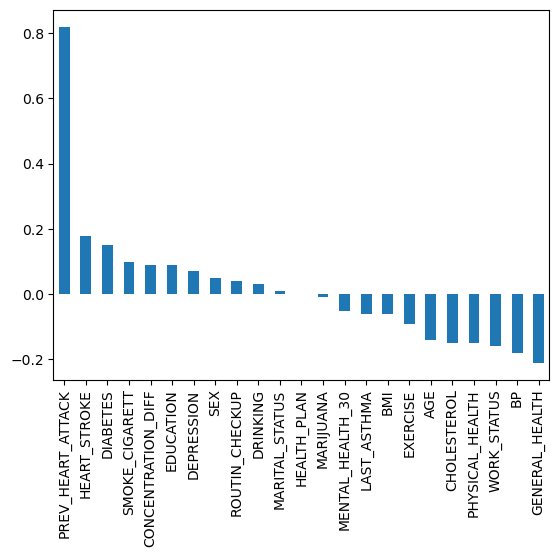

In [433]:
#Corr with HEART_DISEASE
print(round(heart_df_clean.corrwith(heart_df_clean['HEART_DISEASE_TARGET']),2).sort_values(ascending=False).drop('HEART_DISEASE_TARGET'))
round(heart_df_clean.corrwith(heart_df_clean['HEART_DISEASE_TARGET']),2).sort_values(ascending=False).drop('HEART_DISEASE_TARGET').plot(kind='bar')

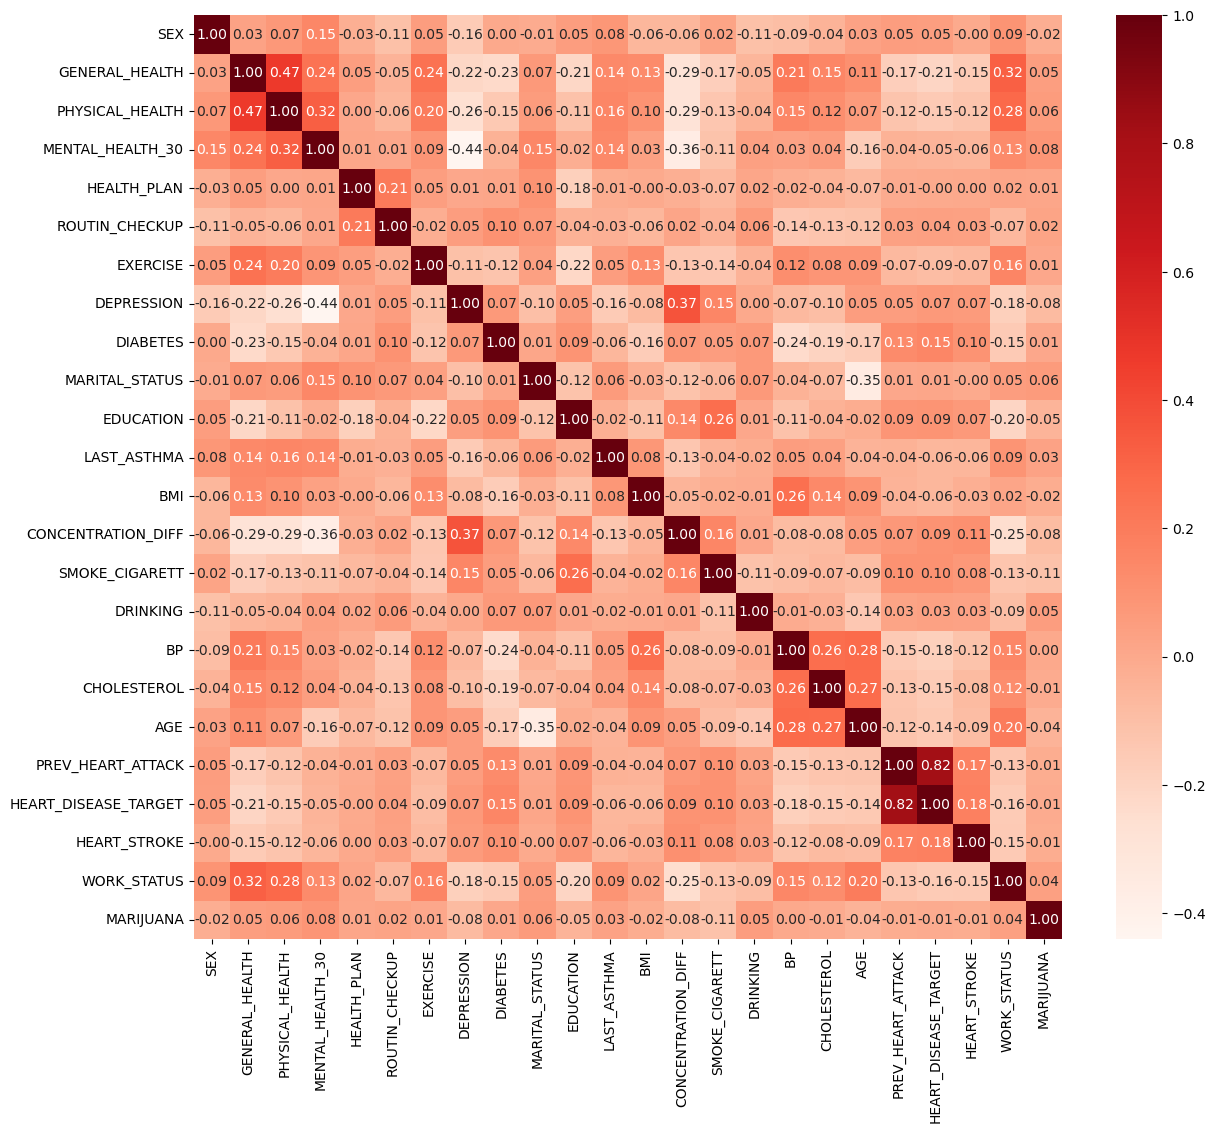

In [434]:
plt.figure(figsize=(14,12))
cor = heart_df_clean.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [435]:
heart_df_clean.to_csv('cdc_1.csv')
print('Completed..')

Completed..


In [436]:
heart_df_clean.shape

(177795, 24)